In [94]:
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

## Función para generar los 500 valores de $\hat{\theta}_1$ y $\hat{\theta}_2$ para $\theta=2.3$ que toma $n$ como parámetro:

In [95]:
def estimadores1(n):
    Muestras=[]
    for i in range(0,500):
        data=np.random.random(size=n)
        inv=np.sqrt(-2*2.3**2*np.log(1-data))
        Muestras.append(inv)
    T1=[]
    for i in range(0,500):
        T1.append(np.sqrt(2/math.pi)*np.average(Muestras[i]))
    T2=[]
    for i in range(0,500):
        S2=np.sum(Muestras[i]**2)
        T2.append(np.sqrt(S2/(2*n)))
    return (T1,T2)

## Función para generar los 500 valores de $\hat{\theta}_1$ y $\hat{\theta}_2$ para $\theta=8$ que toma $n$ como parámetro:

In [96]:
def estimadores2(n):
    Muestras=[]
    for i in range(0,500):
        data=np.random.random(size=n)
        inv=np.sqrt(-2*8**2*np.log(1-data))
        Muestras.append(inv)
    T1=[]
    for i in range(0,500):
        T1.append(np.sqrt(2/math.pi)*np.average(Muestras[i]))
    T2=[]
    for i in range(0,500):
        S2=np.sum(Muestras[i]**2)
        T2.append(np.sqrt(S2/(2*n)))
    return (T1,T2)

## Boxplots de $\hat{\theta}_1$ y $\hat{\theta}_2$:

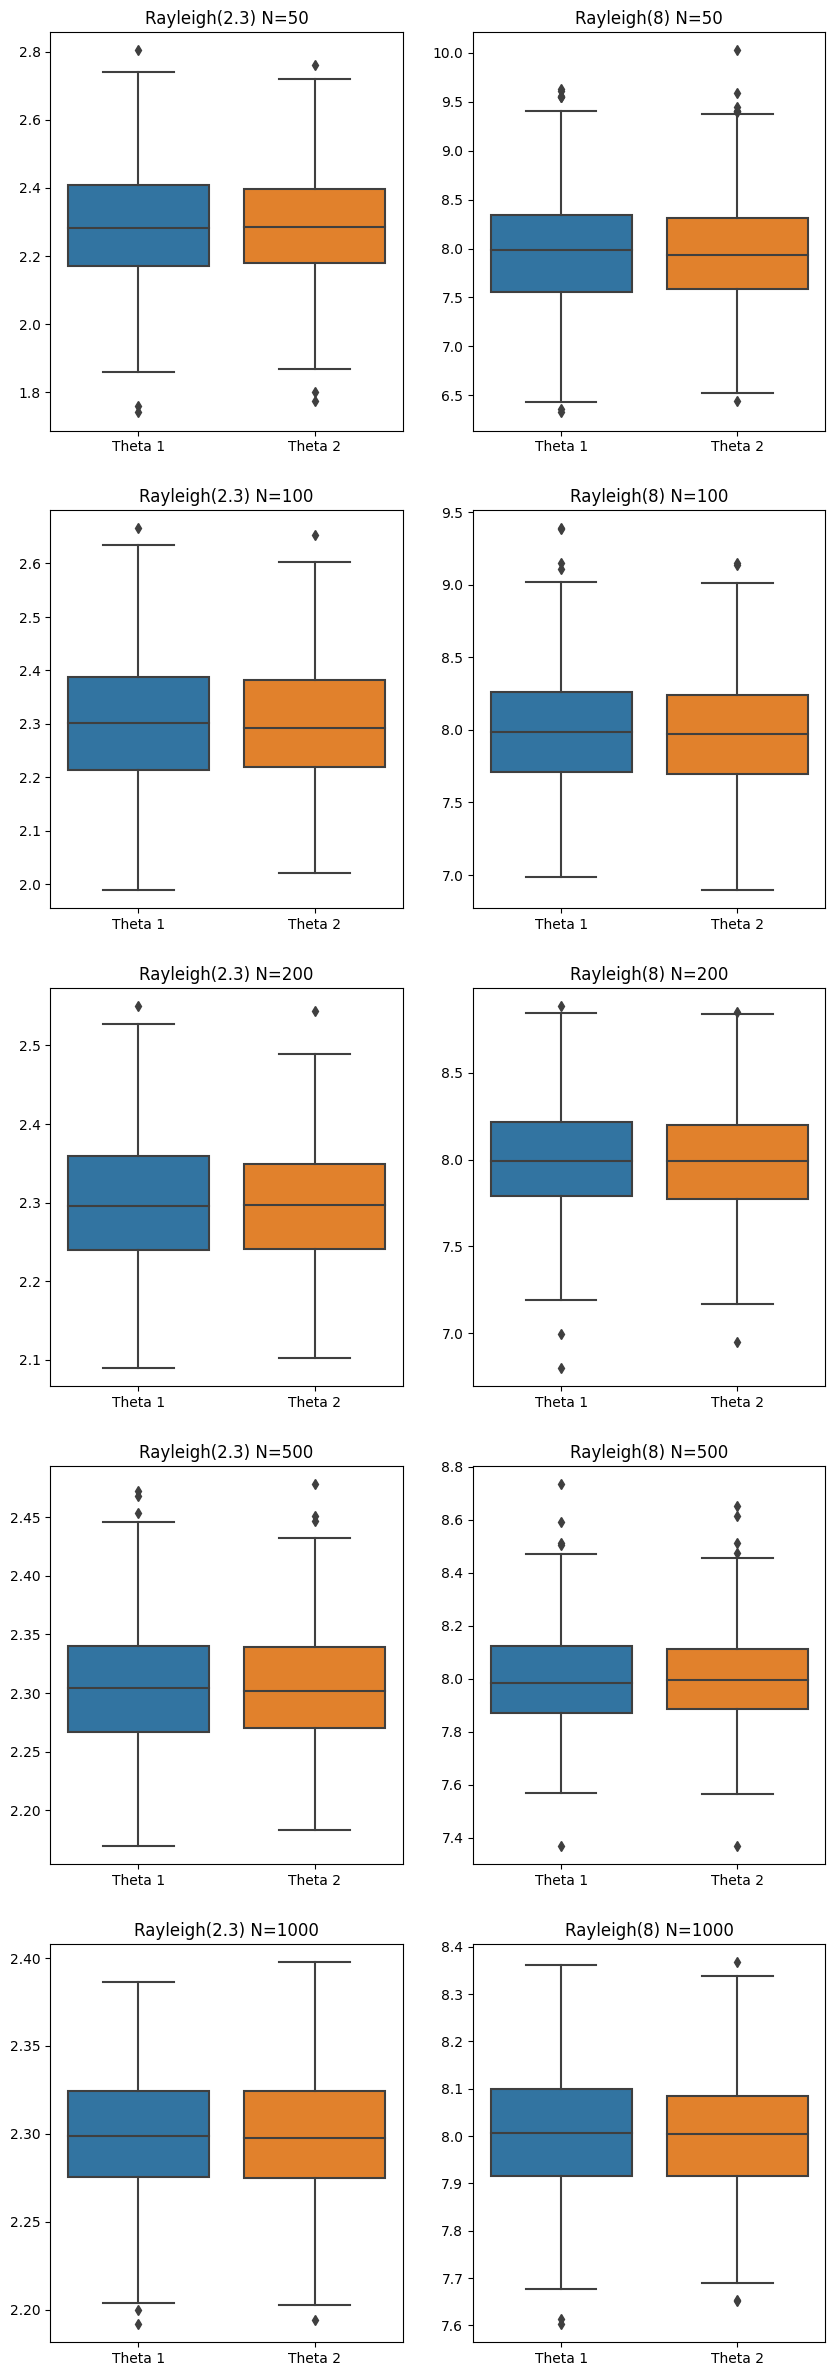

In [97]:
fig, axes = plt.subplots(5,2,figsize=(10, 30))
n=[50,100,200,500,1000]
succ1=[]
for i in range(0,5):
    succ1.append(estimadores1(n[i]))
    sns.boxplot(ax=axes[i][0],data=succ1[i])
    axes[i][0].set_xticklabels(['Theta 1','Theta 2'])
    axes[i][0].set_title('Rayleigh(2.3) N='+str(n[i]))
succ2=[]
for i in range(0,5):
    succ2.append(estimadores2(n[i]))
    sns.boxplot(ax=axes[i][1],data=succ2[i])
    axes[i][1].set_xticklabels(['Theta 1','Theta 2'])
    axes[i][1].set_title('Rayleigh(8) N='+str(n[i]))
#plt.savefig('Boxplots.png')

Para Rayleigh(2.3)

succ1[0] es el vector (T1,T2) para N=50

succ1[1] es el vector (T1,T2) para N=100

etc

succ1[0][0] es el vector T1 para N=50

succ1[0][1] es el vector T2 para N=50

etc

succ2 es lo mismo pero para Rayleigh(8)

## Estimación del sesgo y el ECM para $\theta=2.3$:
Cada celda es de la forma:

Bias de $\hat{\theta}_1$

ECM de $\hat{\theta}_1$

Bias de $\hat{\theta}_2$

ECM de $\hat{\theta}_2$

para N=50,100,...

In [139]:
T1bias50=np.mean(succ1[0][0])-2.3
T1ecm50=T1bias50**2+np.var(succ1[0][0])
T2bias50=np.mean(succ1[0][1])-2.3
T2ecm50=T2bias50**2+np.var(succ1[0][1])
T1bias50,T1ecm50,T2bias50,T2ecm50

(-0.01134414291395025,
 0.029348530451137163,
 -0.01273920946980045,
 0.02817467527342287)

In [140]:
T1bias100=np.mean(succ1[1][0])-2.3
T1ecm100=T1bias100**2+np.var(succ1[1][0])
T2bias100=np.mean(succ1[1][1])-2.3
T2ecm100=T2bias100**2+np.var(succ1[1][1])
T1bias100,T1ecm100,T2bias100,T2ecm100

(0.003273618552687374,
 0.01478745619315097,
 0.0002294530730377886,
 0.013048942321001848)

In [141]:
T1bias200=np.mean(succ1[2][0])-2.3
T1ecm200=T1bias200**2+np.var(succ1[2][0])
T2bias200=np.mean(succ1[2][1])-2.3
T2ecm200=T2bias200**2+np.var(succ1[2][1])
T1bias200,T1ecm200,T2bias200,T2ecm200

(-0.0017464922314847087,
 0.007238050380388915,
 -0.0017140966598505614,
 0.006647943282615642)

In [142]:
T1bias500=np.mean(succ1[3][0])-2.3
T1ecm500=T1bias500**2+np.var(succ1[3][0])
T2bias500=np.mean(succ1[3][1])-2.3
T2ecm500=T2bias500**2+np.var(succ1[3][1])
T1bias500,T1ecm500,T2bias500,T2ecm500

(0.006150155175910221,
 0.0029262071442863937,
 0.005331156981024154,
 0.002636528815320438)

In [143]:
T1bias1000=np.mean(succ1[4][0])-2.3
T1ecm1000=T1bias1000**2+np.var(succ1[4][0])
T2bias1000=np.mean(succ1[4][1])-2.3
T2ecm1000=T2bias1000**2+np.var(succ1[4][1])
T1bias1000,T1ecm1000,T2bias1000,T2ecm1000

(-0.000293668534037117,
 0.0013021368565600976,
 -0.001130606711763349,
 0.0011795892789364312)

## Eficiencia relativa  $\text{Eff}(\hat{\theta}_1,\hat{\theta}_2)$ como estimadores de $\theta=2.3$ para $n=50,100,...$ :

In [144]:
T1T2Eff50=T2ecm50/T1ecm50
T1T2Eff100=T2ecm100/T1ecm100
T1T2Eff200=T2ecm200/T1ecm200
T1T2Eff500=T2ecm500/T1ecm500
T1T2Eff1000=T2ecm1000/T1ecm1000
T1T2Eff50,T1T2Eff100,T1T2Eff200,T1T2Eff500,T1T2Eff1000

(0.9600029316742567,
 0.8824332022059115,
 0.9184715404341293,
 0.9010055287673084,
 0.9058873289652482)

Text(0.5, 1.0, 'Rayleigh 2.3')

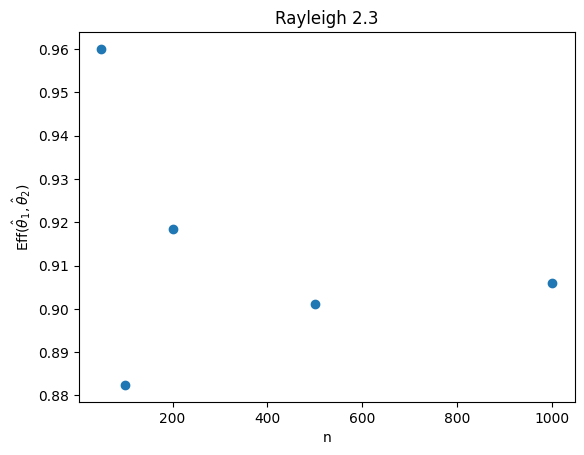

In [145]:
x1=[50,100,200,500,1000]
y1=[T1T2Eff50,T1T2Eff100,T1T2Eff200,T1T2Eff500,T1T2Eff1000]
plt.scatter(x1,y1)
plt.xlabel('n')
plt.ylabel(r"Eff($\hat\theta_1,\hat\theta_2$)")
plt.title('Rayleigh 2.3')

## Estimación del sesgo y el ECM para $\theta=8$:
Cada celda es de la forma:

Bias de $\hat{\theta}_1$

ECM de $\hat{\theta}_1$

Bias de $\hat{\theta}_2$

ECM de $\hat{\theta}_2$

para N=50,100,...

In [146]:
T1bias50=np.mean(succ2[0][0])-8
T1ecm50=T1bias50**2+np.var(succ2[0][0])
T2bias50=np.mean(succ2[0][1])-8
T2ecm50=T2bias50**2+np.var(succ2[0][1])
T1bias50,T1ecm50,T2bias50,T2ecm50

(-0.018584935365621114,
 0.3561473556637575,
 -0.03920125043253542,
 0.321701438711523)

In [147]:
T1bias100=np.mean(succ2[1][0])-8
T1ecm100=T1bias100**2+np.var(succ2[1][0])
T2bias100=np.mean(succ2[1][1])-8
T2ecm100=T2bias100**2+np.var(succ2[1][1])
T1bias100,T1ecm100,T2bias100,T2ecm100

(-0.013847901683126551,
 0.16394588289555123,
 -0.029111045599858443,
 0.155847316313612)

In [148]:
T1bias200=np.mean(succ2[2][0])-8
T1ecm200=T1bias200**2+np.var(succ2[2][0])
T2bias200=np.mean(succ2[2][1])-8
T2ecm200=T2bias200**2+np.var(succ2[2][1])
T1bias200,T1ecm200,T2bias200,T2ecm200

(-0.006749805006417198,
 0.08994203625581902,
 -0.00958038161984387,
 0.08387320924074793)

In [149]:
T1bias500=np.mean(succ2[3][0])-8
T1ecm500=T1bias500**2+np.var(succ2[3][0])
T2bias500=np.mean(succ2[3][1])-8
T2ecm500=T2bias500**2+np.var(succ2[3][1])
T1bias500,T1ecm500,T2bias500,T2ecm500

(-0.0008649613331233041,
 0.03512030092599803,
 0.00109485093942574,
 0.03223218631218313)

In [150]:
T1bias1000=np.mean(succ2[4][0])-8
T1ecm1000=T1bias1000**2+np.var(succ2[4][0])
T2bias1000=np.mean(succ2[4][1])-8
T2ecm1000=T2bias1000**2+np.var(succ2[4][1])
T1bias1000,T1ecm1000,T2bias1000,T2ecm1000

(0.0054289440947012935,
 0.017482281811974604,
 0.0015946047952919429,
 0.015613492904293869)

## Eficiencia relativa  $\text{Eff}(\hat{\theta}_1,\hat{\theta}_2)$ como estimadores de $\theta=8$ para $n=50,100,...$ :

In [151]:
T1T2Eff50=T2ecm50/T1ecm50
T1T2Eff100=T2ecm100/T1ecm100
T1T2Eff200=T2ecm200/T1ecm200
T1T2Eff500=T2ecm500/T1ecm500
T1T2Eff1000=T2ecm1000/T1ecm1000
T1T2Eff50,T1T2Eff100,T1T2Eff200,T1T2Eff500,T1T2Eff1000

(0.9032818399338187,
 0.9506021960484439,
 0.9325251320994141,
 0.9177650948976649,
 0.8931038334823835)

Text(0.5, 1.0, 'Rayleigh 8')

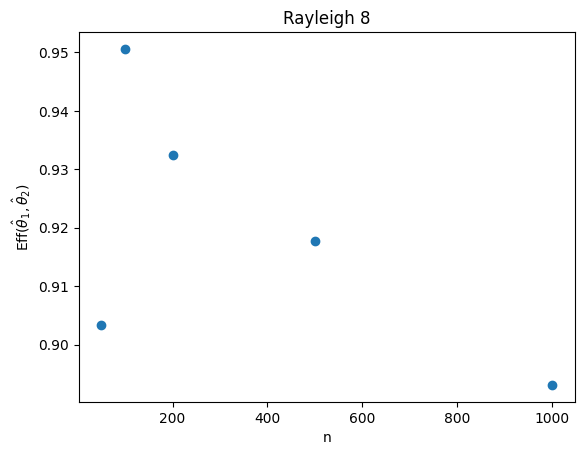

In [152]:
x1=[50,100,200,500,1000]
y1=[T1T2Eff50,T1T2Eff100,T1T2Eff200,T1T2Eff500,T1T2Eff1000]
plt.scatter(x1,y1)
plt.xlabel('n')
plt.ylabel(r"Eff($\hat\theta_1,\hat\theta_2$)")
plt.title('Rayleigh 8')